In [20]:
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from os.path import expanduser
from glob import glob
import pandas as pd

In [19]:
coords = np.load(expanduser('~/fair/streetlearn/processed-data/manhattan/coords.npy'), allow_pickle=True)
chunks = glob(expanduser("~/fair/streetlearn/processed-data/manhattan/view_512/*"))
chunks.sort()
compressed_images = np.concatenate([np.load(p, allow_pickle=True) for p in chunks])

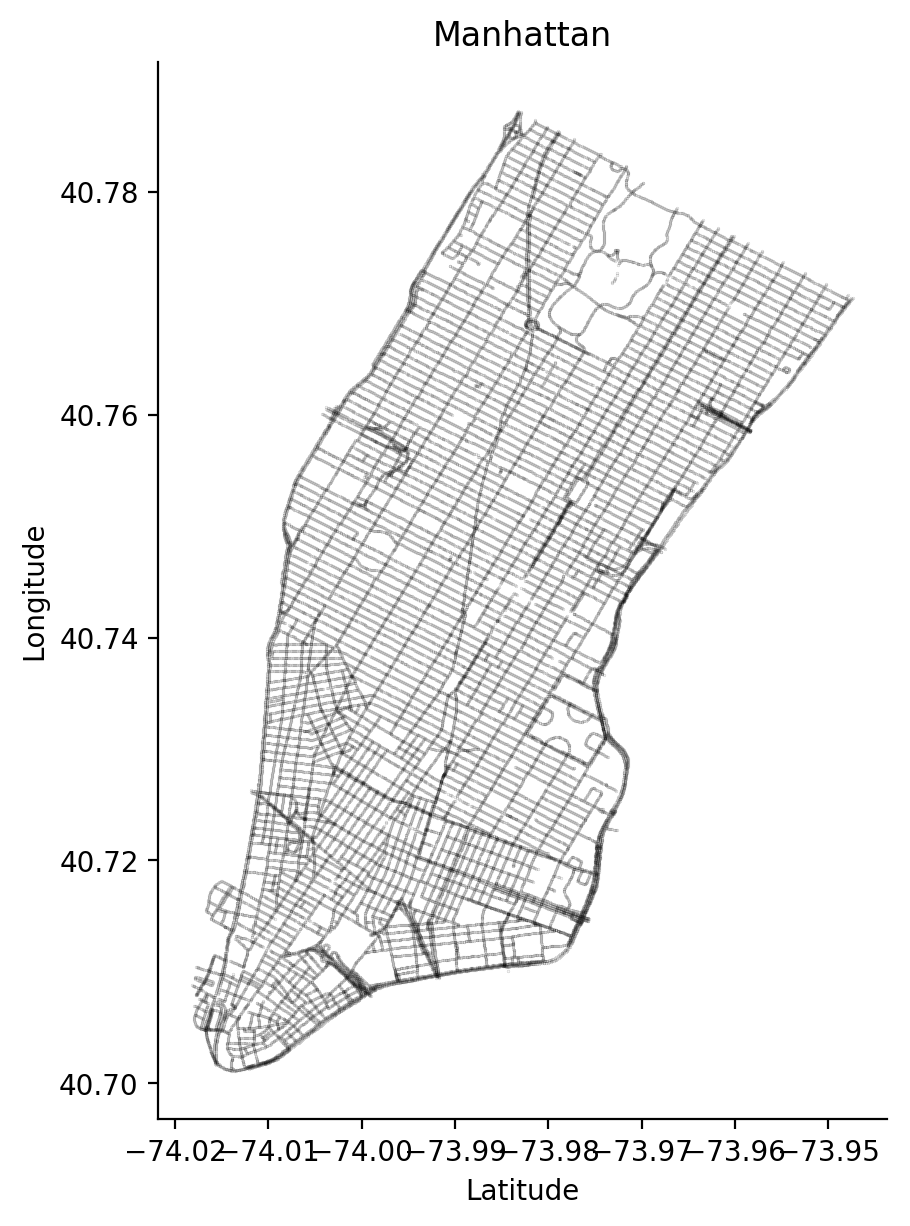

In [21]:

coord_df = pd.DataFrame(list(coords))
plt.figure(figsize=(4.7, 7), dpi=200)
plt.scatter(coord_df['lng'], coord_df['lat'], s=0.02, color="black", alpha=0.3)
plt.title('Manhattan')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.savefig('figures/manhattan_map.png')

https://codeyarns.com/2015/01/23/how-to-specify-opencv-color-type-in-python/

In openCV, the image read pipeline seems to be defined by flags
```c
enum {
    /* 8bit, color or not */
    CV_LOAD_IMAGE_UNCHANGED  =-1,
    /* 8bit, gray */
    CV_LOAD_IMAGE_GRAYSCALE  =0,
    /* ?, color */
    CV_LOAD_IMAGE_COLOR      =1,
    /* any depth, ? */
    CV_LOAD_IMAGE_ANYDEPTH   =2,
    /* ?, any color */
    CV_LOAD_IMAGE_ANYCOLOR   =4
};
```

In [4]:
def blob2image(image_blob):
    """
    
    :param image_blob: 
    :return: Size(H, W, C) (208, 416, 3)
    """
    img_array = np.frombuffer(image_blob, np.uint8)
    return cv2.imdecode(img_array, 2 | 4)

In [5]:
img = blob2image(compressed_images[1])
Image.fromarray(img).show()

generating the dataset

1. make sure the images are taken during the day (instead of mix b/c day and night)
2. 50% neighbors, 50% non-neighbors

1. verify that the local metric is working
2. show distribution of way points retrieved by the local metric matrix

try to push for over-fit.

In [5]:
def inside(coord, origin, w, h):
    x0, y0 = origin
    x, y = coord
    return x0 <= x <= x0 + w and y0 <= y <= y0 + h

assert inside([0, 0], [-0.5, -0.5], 1, 1)
assert not inside([0, 0], [-0.5, -0.5], 1, 0.2)
assert not inside([0, 0], [-0.5, -0.5], 0.2, 0.2)

In [6]:
all_coords = np.array(list(zip(coord_df['lng'], coord_df['lat'])))

bbox = (-73.997, 40.725,), 0.01, 0.008
inside_mask = np.array([inside(_, *bbox) for _ in all_coords])
included = np.array([inside(_, *bbox) for _ in all_coords])

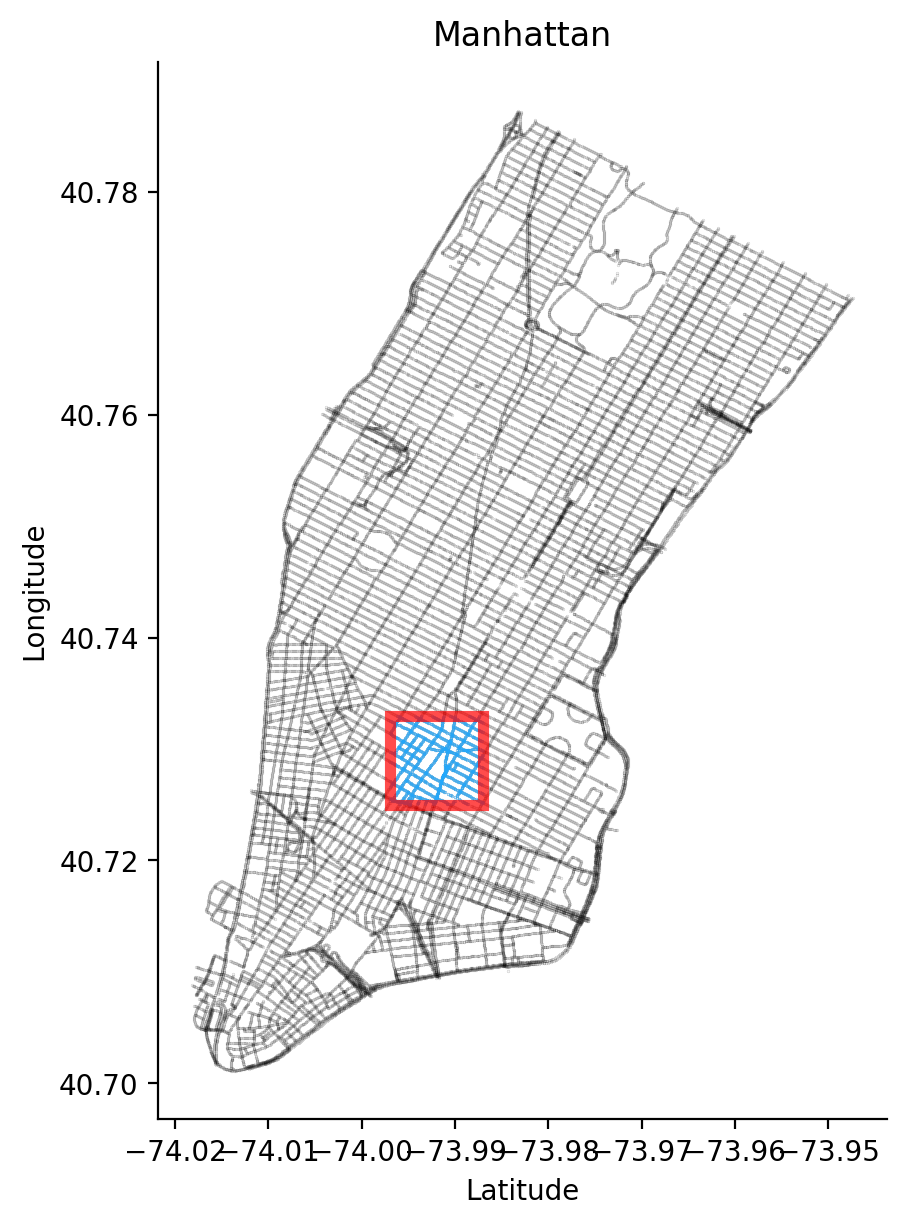

In [25]:
from matplotlib import patches
plt.figure(figsize=(4.7, 7), dpi=200)
plt.scatter(coord_df['lng'], coord_df['lat'], s=0.02, facecolor="black", alpha=0.3)
plt.scatter(*all_coords[included].T, s=0.02, color="#23aaff")
rect = patches.Rectangle(*bbox, linewidth=4, edgecolor='r', facecolor='none', alpha=0.7)
plt.gca().add_patch(rect)
plt.title('Manhattan')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.savefig('figures/manhattan_map_selection.png')


this is just text

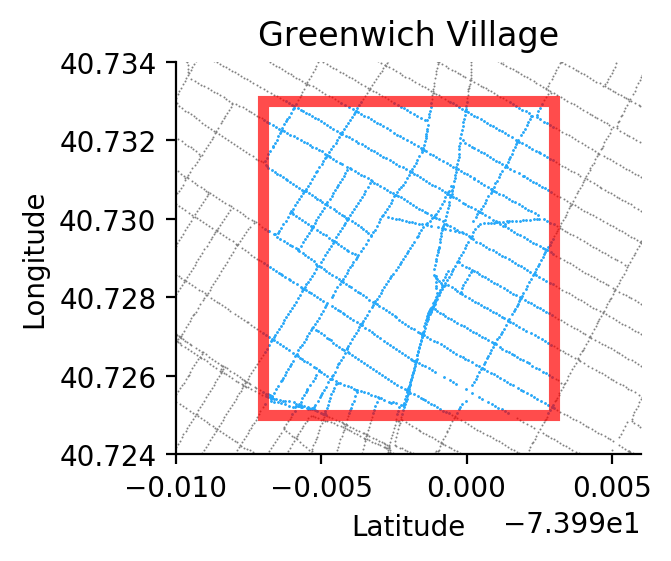

In [47]:
from matplotlib import patches
plt.figure(figsize=(3, 2.6), dpi=200)
plt.scatter(coord_df['lng'], coord_df['lat'], s=0.5, facecolor="gray", lw=0)
plt.scatter(*all_coords[included].T, s=1, facecolor="#23aaff", lw=0)
rect = patches.Rectangle(*bbox, linewidth=4, edgecolor='r', facecolor="none", alpha=0.7)
plt.gca().add_patch(rect)
plt.title('Greenwich Village')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.xlim(bbox[0][0] - 0.003, bbox[0][0] + bbox[1] + 0.003)
plt.ylim(bbox[0][1] - 0.001, bbox[0][1] + bbox[2] + 0.001)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.savefig('figures/manhattan_map_blow_out.png')